In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import itertools as it
from datetime import datetime

In [2]:
data = pd.read_json('./data/finance/datensaetze.json')

In [3]:
data.columns

Index(['amount', 'bookingDate', 'bookingKey', 'cleanPurpose', 'creditor',
       'creditorAccountNumber', 'creditorBankCode', 'debtor',
       'debtorAccountNumber', 'debtorBankCode', 'endToEndId', 'id',
       'mandateId', 'prebooked', 'purpose', 'transactionPatternId', 'type',
       'valueDate'],
      dtype='object')

In [4]:
# transform dates and amounts to useable types
amounts = data["amount"]
data["amount"] = pd.Series([float(x["value"].replace(",", ".")) for x in amounts])
data["bookingDate"] = pd.Series(list(map(pd.Timestamp, data["bookingDate"])))

## Amounts

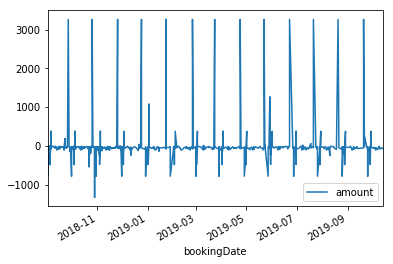

In [5]:
data.plot("bookingDate", "amount")

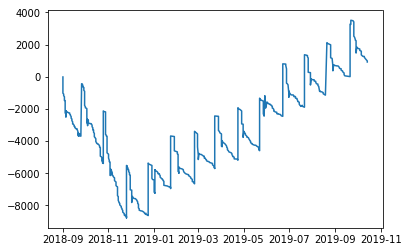

In [6]:
plt.plot(data["bookingDate"], list(it.accumulate(data["amount"][::-1]))[::-1])

## Creditors

In [11]:
grps = data.loc[:, ["creditor", "amount"]].groupby("creditor").sum().sort_values(by="amount")
grps

,amount
creditor,
GWG Gesellschaft für Wohnun gs- und Gewerbebau Baden-Wü,-10903.34
BAYERISCHE BEAMTENKRANKENKA SSE AG,-6697.46
DKV DEUTSCHE KRANKENVERS.AG 40198 DUESSELDORF,-3248.98
DETLEV LOUIS GMBH,-1941.32
VATTENFALL,-1470.00
0,-1391.79
Shell Deutschland Oil GmbH,-1376.27
PayPal Europe S.a.r.l. et C ie S.C.A,-1313.05
E.ON Energie Deutschland,-1246.00


## Patterns

In [25]:
dat = data.loc[:, ["creditor", "amount", "bookingDate"]]
grps = dat.groupby(["creditor", "amount"]).count()
grps

bookingDate
creditor                 amount              
0                        -75.00             2
                         -70.00             3
                         -63.24             1
                         -60.00            12
                         -56.84             1
                         -50.00             1
                         -47.89             1
                         -45.26             1
                         -42.56             1
                         -6.00              1
113 POLO-Musterstadt     -251.26            1
                         -69.93             1
                         -46.97             1
                         -25.93             1
                         -18.44             1
                         -16.49             1
2520 - GETRÄNKE HOFFMANN -30.97             1
                         -29.35             1
                         -22.69             1
                         -18.99             1
                         -18.45             1
2554 /W.HOYER KG         -89.75             1
                         -69.45             1
                         -62.45             1
                         -47.25             1
                         -45.98             1
                         -32.45             1
A.T.U AUTO-TEILE-UNGER   -42.99             1
                         -42.98             1
                         -35.98             1
...                                       ...
TOTAL DEUTSCHLAND GM     -61.24             1
                         -59.87             1
                         -54.87             1
                         -54.68             1
                         -53.26             1
                         -52.34             1
                         -49.15             1
                         -48.42             1
                         -48.38             1
                         -48.12             1
                         -32.48             1
Telefonica Germany GmbH  -37.97            14
UniCredit Bank AG        -200.00            1
                         -100.00            1
                         -70.00             1
                         -50.00             2
V PAY                    -54.68             1
                         -48.76             1
                         -45.78             1
                         -35.45             1
                         -26.45             3
                         -25.46             1
                         -12.45             1
                         -11.35             1
                         -7.54              1
                         -6.96              1
VATTENFALL               -105.00           14
Vorwerk Deutschland      -18.00             1
mediserv GmbH            -62.55             5
unimed                   -19.23             6

[419 rows x 1 columns]

In [26]:
data.to_csv("finance.csv")